Author: Carlos Roberto de Melo

Date: 04/23/2020

Obj: Build a elliptical profile base on the average ellipses.
Queremos agora realizar uma média em elípses da imagem que é razão entre as bandas F475w e F814w.

Para isso, a elipticidade da galáxia é levada em conta e percorremos todo o semi-seixo maior (que está alinhado com o eixo x) px a px. Para determinar a elipticidade o código Find My Galaxy foi utilizado nas imagens originais anteriormente.

In [28]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter as clock

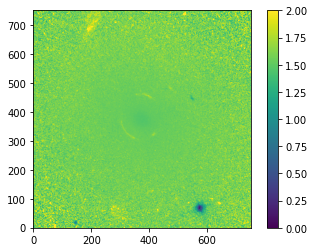

In [29]:
#Abrindo a razão F475w/F814w
hdu = fits.open('/home/carlos/Desktop/ESO325 HST Data Reduction/Data/F475_divided_F814_timeScale.fits')
data = hdu[1].data
copy = data #Cria uma cópia para não alterar a imagem original

#Apenas vericando se a imagem é correta
plt.imshow(data, vmin=0, vmax=2,origin='lower')
plt.colorbar()

In [43]:
#Define the ellipse properties based on MGE
e = 0.220                   #Ellipticity of MGE
major_axis = 160            #Value in px. This value is not the same as the MGE, but how far 
                                #I want to make the average
x0 = np.int(copy.shape[1]/2 -1)   #x center in px
y0 = np.int(copy.shape[0]/2 -1)   #y center in px
theta = 67.7                  #Angle of the ellipse with respect to x-axis, in degree
x_length = copy.shape[1]    #Length of x axis
y_length = copy.shape[0]    #Length of y axis
x0

374

In [38]:
#O passo realizado aqui percorre px a px.

#Define the loop and the mean properties
t = clock()
r_mean = []    #Average in each 'radius'
el_numb = []   #Number of elements in each 'radius'

for a in range(0, major_axis+1, 1): #Loop for running all possible ellipses
    
    sum = 0        #Here we are zeroing the sum
    elements = 0   #Here we are zeroing the number of elements
    
    for x in range(x_length):
        for y in range(y_length):
            
            x_0 = x - x0 #Translated X Position 
            y_0 = y - y0 #Translated Y Position
            
            r = np.sqrt(((((x_0**2)*((np.cos(theta*np.pi/180)**2)*(1-e)**2 + np.sin(theta*np.pi/180)**2) +
                        (y_0**2)*((np.sin(theta*np.pi/180)**2)*(1-e)**2 + np.cos(theta*np.pi/180)**2) +
                            2*e*np.sin(theta*np.pi/180)*np.cos(theta*np.pi/180)*x_0*y_0*(2-e)))/(1-e)**2))
            
            if r >= a and r < a+1:
                sum = sum + copy[y][x]
                elements = elements + 1
                
    r_mean.append(sum/elements)   #Compute the mean and save in the r_mean array
    el_numb.append(elements)      #Save in a array the number of elements in each 'radius'
    print('Radius:%f, Mean:%f, Elements:%f'%(a,sum/elements,elements)) #Print some importat informations

print('Time: %f'%(clock()-t))

Radius:0.000000, Mean:1.510862, Elements:1.000000
Radius:1.000000, Mean:1.492138, Elements:8.000000
Radius:2.000000, Mean:1.477094, Elements:14.000000
Radius:3.000000, Mean:1.467075, Elements:16.000000
Radius:4.000000, Mean:1.464687, Elements:20.000000
Radius:5.000000, Mean:1.464949, Elements:26.000000
Radius:6.000000, Mean:1.464115, Elements:34.000000
Radius:7.000000, Mean:1.464433, Elements:36.000000
Radius:8.000000, Mean:1.465576, Elements:48.000000
Radius:9.000000, Mean:1.466877, Elements:44.000000
Radius:10.000000, Mean:1.468457, Elements:48.000000
Radius:11.000000, Mean:1.468817, Elements:54.000000
Radius:12.000000, Mean:1.469994, Elements:64.000000
Radius:13.000000, Mean:1.472148, Elements:74.000000
Radius:14.000000, Mean:1.473068, Elements:70.000000
Radius:15.000000, Mean:1.474802, Elements:68.000000
Radius:16.000000, Mean:1.476055, Elements:82.000000
Radius:17.000000, Mean:1.476586, Elements:88.000000
Radius:18.000000, Mean:1.478799, Elements:88.000000
Radius:19.000000, Mean:1

Radius:155.000000, Mean:1.557071, Elements:782.000000
Radius:156.000000, Mean:1.556803, Elements:752.000000
Radius:157.000000, Mean:1.556761, Elements:766.000000
Radius:158.000000, Mean:1.558166, Elements:786.000000
Radius:159.000000, Mean:1.559275, Elements:792.000000
Radius:160.000000, Mean:1.560352, Elements:782.000000
Time: 1170.809533


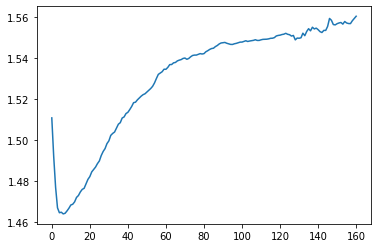

In [39]:
#Apenas verifica a forma do perfil elíptico
plt.plot(r_mean)

In [40]:
#Apenas verifica o número de px's em cada elípse. Essa é uma maneira de verificar se o loop acima coincide com o loop abaixo
t = np.transpose(el_numb)
print(t)

[  1   8  14  16  20  26  34  36  48  44  48  54  64  74  70  68  82  88
  88 104  94 108 110 110 126 126 128 134 140 152 146 146 156 166 174 170
 172 178 198 198 204 200 208 208 214 234 228 230 236 242 244 268 254 262
 262 274 284 280 284 288 302 306 306 298 314 328 324 334 334 328 338 352
 372 356 362 360 382 390 380 392 398 392 402 416 422 424 410 428 442 442
 438 456 444 462 468 468 466 472 486 498 496 480 492 520 504 516 518 526
 532 542 546 552 554 544 564 570 584 574 564 590 600 596 600 606 596 626
 624 628 622 624 650 648 658 648 648 666 684 670 668 682 666 694 724 696
 710 722 700 730 734 730 740 732 740 772 746 782 752 766 786 792 782]


In [41]:
#Gera a imagem com as médias em elípses. Caso tenha optado por um passo menor que 1px acima, aqui será necessário
    #comentar as linhas relativas ao for e descomentar as linhas relativas ao while.
#Uma maneira de verificar se o loop está correto é verificar se o número de px's em cada raio é consistente com
    #os valores impressos acima.
t = clock()
for i in range(len(r_mean)):

    count = 0
    for x in range(x_length):
        for y in range(y_length):
            
            x_0 = x - x0 #Translated X Position 
            y_0 = y - y0 #Translated Y Position
            
            distance = np.sqrt(((((x_0**2)*((np.cos(theta*np.pi/180)**2)*(1-e)**2 + np.sin(theta*np.pi/180)**2) +
                        (y_0**2)*((np.sin(theta*np.pi/180)**2)*(1-e)**2 + np.cos(theta*np.pi/180)**2) +
                            2*e*np.sin(theta*np.pi/180)*np.cos(theta*np.pi/180)*x_0*y_0*(2-e)))/(1-e)**2))
            
            if distance >= i and distance < i+1:
                copy[y][x] = r_mean[i]
                count = count + 1
   
    print('Raio %f, contagem %d'%(i,count))
print('Time: %f'%(clock()-t))

Raio 0.000000, contagem 1
Raio 1.000000, contagem 8
Raio 2.000000, contagem 14
Raio 3.000000, contagem 16
Raio 4.000000, contagem 20
Raio 5.000000, contagem 26
Raio 6.000000, contagem 34
Raio 7.000000, contagem 36
Raio 8.000000, contagem 48
Raio 9.000000, contagem 44
Raio 10.000000, contagem 48
Raio 11.000000, contagem 54
Raio 12.000000, contagem 64
Raio 13.000000, contagem 74
Raio 14.000000, contagem 70
Raio 15.000000, contagem 68
Raio 16.000000, contagem 82
Raio 17.000000, contagem 88
Raio 18.000000, contagem 88
Raio 19.000000, contagem 104
Raio 20.000000, contagem 94
Raio 21.000000, contagem 108
Raio 22.000000, contagem 110
Raio 23.000000, contagem 110
Raio 24.000000, contagem 126
Raio 25.000000, contagem 126
Raio 26.000000, contagem 128
Raio 27.000000, contagem 134
Raio 28.000000, contagem 140
Raio 29.000000, contagem 152
Raio 30.000000, contagem 146
Raio 31.000000, contagem 146
Raio 32.000000, contagem 156
Raio 33.000000, contagem 166
Raio 34.000000, contagem 174
Raio 35.000000, c

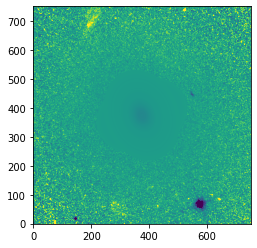

In [42]:
#Salvando o perfil elíptico na forma de uma imagem .fits. Esse perfil é o nosso 'filtro'
header_new = hdu[1].header
new = fits.PrimaryHDU(copy,header=header_new)
hdul = fits.HDUList([new])
plt.imshow(copy,vmin=1, vmax=2,origin='lower')
hdul.writeto('/home/carlos/Desktop/ESO325 HST Data Reduction/Data/Filtro.fits')

In [36]:
from mpdaf.obj import Image

In [151]:
img1 = Image('/home/carlos/Desktop/ESO325 HST Data Reduction/Data/Filtro157.fits')
ima2 = Image('/home/carlos/Desktop/ESO325 HST Data Reduction/Data/Filtro.fits')

img3 = img1 - ima2
img3.write('/home/carlos/Desktop/ESO325 HST Data Reduction/Data/dif.fits')